# Global Superstore Sales – Exploratory Data Analysis (EDA)

## Objective
This project performs an exploratory data analysis on a global retail sales dataset
to uncover patterns in sales, profitability, discounting, shipping performance, and
product-level efficiency. The goal is to derive actionable business insights that can
support pricing and operational decisions.


In [40]:
import pandas as pd

df = pd.read_csv("../data/superstore.csv")
df.head(10)


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
5,Office Supplies,Los Angeles,United States,JF-154904,Jeremy Farry,0.0,US,1,2011-10-19 00:00:00.000,CA-2011-117317,...,13,Consumer,2011-10-19 00:00:00.000,Same Day,2.39,California,Paper,2011,North America,43
6,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0.0,US,1,2011-11-04 00:00:00.000,CA-2011-125829,...,19,Consumer,2011-11-11 00:00:00.000,Standard Class,1.15,California,Paper,2011,North America,45
7,Office Supplies,Los Angeles,United States,JA-159704,Joseph Airdo,0.0,US,1,2011-11-12 00:00:00.000,CA-2011-151295,...,12,Consumer,2011-11-16 00:00:00.000,Standard Class,0.92,California,Paper,2011,North America,46
8,Office Supplies,Los Angeles,United States,SP-209204,Susan Pistek,0.0,US,1,2011-11-22 00:00:00.000,CA-2011-135090,...,54,Consumer,2011-11-26 00:00:00.000,Standard Class,6.98,California,Paper,2011,North America,48
9,Office Supplies,Los Angeles,United States,RL-196154,Rob Lucas,0.0,US,1,2011-12-05 00:00:00.000,CA-2011-133830,...,49,Consumer,2011-12-10 00:00:00.000,Standard Class,1.99,California,Paper,2011,North America,50


## Data Loading and Overview
The dataset contains transactional-level sales records including order details,
customer information, product attributes, shipping data, and financial metrics.


In [7]:
df.shape

(51290, 27)

In [8]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [ ]:
#checking the data types of each row
df.dtypes

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [ ]:
#checking for missing values
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

## Data Cleaning and Feature Engineering

Date columns were converted to datetime format, unnecessary columns were removed,
and new features were created to support time-based and logistics analysis.


In [11]:
df[['Order.Date','Ship.Date']].head()

,Order.Date,Ship.Date
0,2011-01-07 00:00:00.000,2011-01-09 00:00:00.000
1,2011-01-21 00:00:00.000,2011-01-26 00:00:00.000
2,2011-08-05 00:00:00.000,2011-08-09 00:00:00.000
3,2011-08-05 00:00:00.000,2011-08-09 00:00:00.000
4,2011-09-29 00:00:00.000,2011-10-03 00:00:00.000


In [12]:
df['Order.Date']=pd.to_datetime(df['Order.Date'])
df['Ship.Date']=pd.to_datetime(df['Ship.Date'])

In [13]:
df['Delivery_Days']=(df['Ship.Date'] - df['Order.Date']).dt.days

In [16]:
df['Order_Year'] = df['Order.Date'].dt.year
df['Order_Month'] = df['Order.Date'].dt.month
df['Order_Month_Name'] = df['Order.Date'].dt.month_name()


In [17]:
df=df.drop(columns=['记录数'])

In [18]:
df.shape

(51290, 30)

## Descriptive Statistics

Summary statistics provide an overview of sales distribution, profitability,
discount usage, and delivery times.


In [19]:
df[['Delivery_Days', 'Sales', 'Profit', 'Discount']].describe()


,Delivery_Days,Sales,Profit,Discount
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.969370,246.498440,28.610982,0.142908
std,1.729437,487.567175,174.340972,0.212280
min,0.000000,0.000000,-6599.978000,0.000000
25%,3.000000,31.000000,0.000000,0.000000
50%,4.000000,85.000000,9.240000,0.000000
75%,5.000000,251.000000,36.810000,0.200000
max,7.000000,22638.000000,8399.976000,0.850000


## Sales Distribution

This section examines how sales values are distributed across orders.


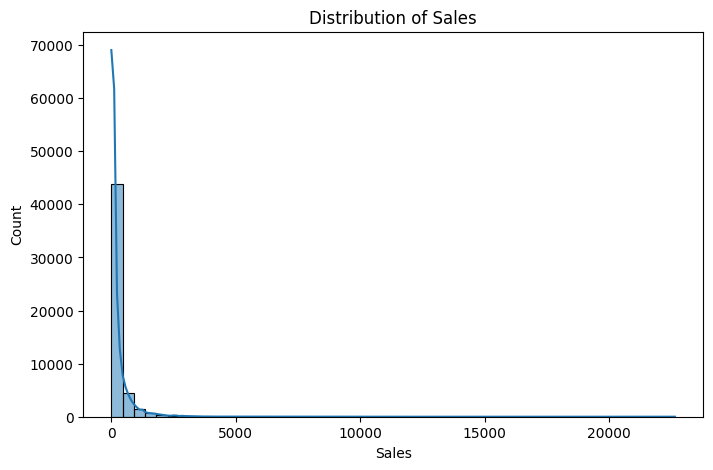

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.show()


## Impact of Discounts on Profitability
This analysis investigates how discount levels affect profit margins.


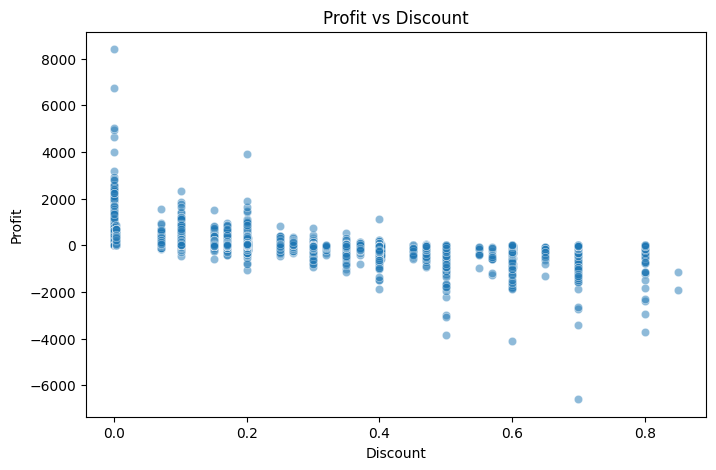

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Profit vs Discount')
plt.show()


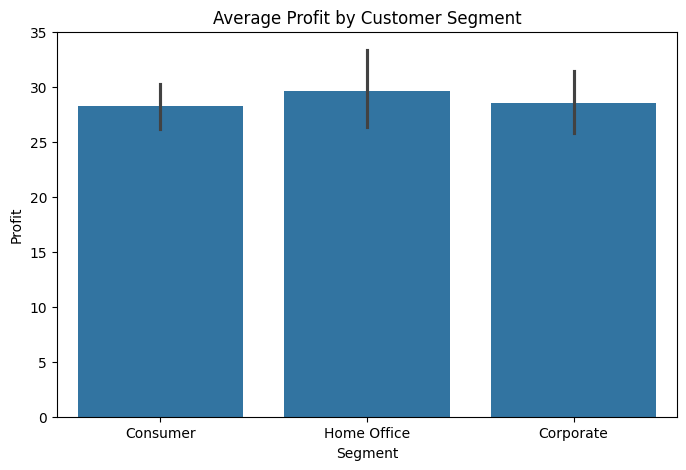

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Profit', data=df, estimator='mean')
plt.title('Average Profit by Customer Segment')
plt.show()


In [23]:
df['Sales'].max()


np.int64(22638)

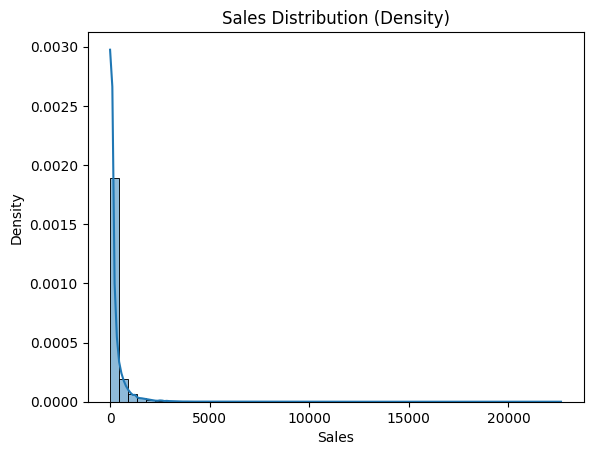

In [25]:
sns.histplot(df['Sales'], bins=50, stat='density', kde=True)
plt.title('Sales Distribution (Density)')
plt.show()


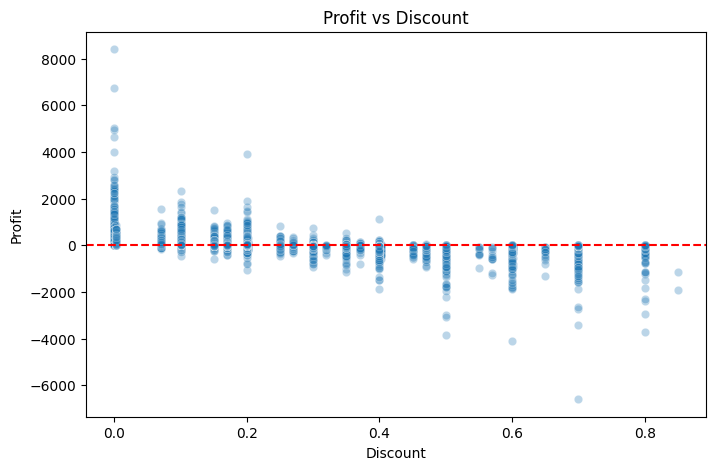

In [26]:
#profit vs discount analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Discount',
    y='Profit',
    data=df,
    alpha=0.3
)
plt.axhline(0, color='red', linestyle='--')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


In [27]:
discount_bins = [0, 0.1, 0.2, 0.3, 0.4, 1.0]
discount_labels = ['0–10%', '10–20%', '20–30%', '30–40%', '40%+']

df['Discount_Range'] = pd.cut(
    df['Discount'],
    bins=discount_bins,
    labels=discount_labels
)


In [28]:
df.groupby('Discount_Range')['Profit'].mean()


C:\Users\Ernesto\AppData\Local\Temp\ipykernel_6024\401378361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Discount_Range')['Profit'].mean()


Discount_Range
0–10%     72.278107
10–20%    27.614734
20–30%   -21.877573
30–40%   -48.857485
40%+     -90.132312
Name: Profit, dtype: float64

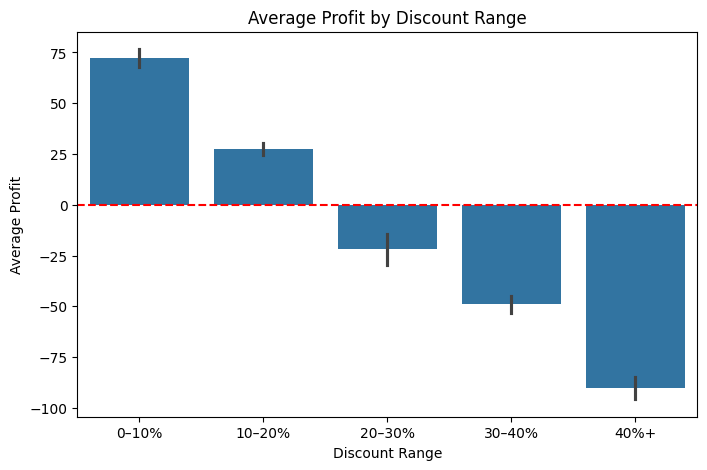

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Discount_Range',
    y='Profit',
    data=df,
    estimator='mean'
)
plt.axhline(0, color='red', linestyle='--')
plt.title('Average Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Profit')
plt.show()


### Impact of Discounts on Profitability

Analysis shows a strong negative relationship between discount levels and profit.
Orders with discounts above 30% are, on average, loss-making, while low-discount
orders maintain positive profitability. This suggests the need for stricter discount
policies to protect margins.


In [30]:
df.groupby('Discount_Range')['Profit'].agg(['mean', 'min', 'max', 'count'])


C:\Users\Ernesto\AppData\Local\Temp\ipykernel_6024\2030411040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Discount_Range')['Profit'].agg(['mean', 'min', 'max', 'count'])


,mean,min,max,count
Discount_Range,,,,
0–10%,72.278107,-445.4400,2316.5100,4679
10–20%,27.614734,-1049.3406,3919.9888,6274
20–30%,-21.877573,-953.4420,822.6600,967
30–40%,-48.857485,-1862.3124,1119.9968,3400
40%+,-90.132312,-6599.9780,61.7160,6961


### Impact of Discount on Profitability

Analysis shows a clear negative relationship between discount levels and profitability.
Orders with discounts up to 20% remain profitable on average, while discounts above
20% consistently result in losses. Notably, discounts above 40% are both frequent and
highly loss-making, representing a significant risk to business profitability.


In [31]:
df['Delivery_Days'].value_counts().sort_index()


Delivery_Days
0     2600
1     1662
2     7026
3     5035
4    14434
5    11221
6     6255
7     3057
Name: count, dtype: int64

In [32]:
#average profit by delivery speed
df.groupby('Delivery_Days')['Profit'].mean()


Delivery_Days
0    28.250621
1    26.125385
2    29.221195
3    27.215195
4    28.980940
5    28.517252
6    28.150743
7    30.704219
Name: Profit, dtype: float64

## Shipping Speed and Profitability
This section analyzes the relationship between delivery time, shipping cost,
and profit.


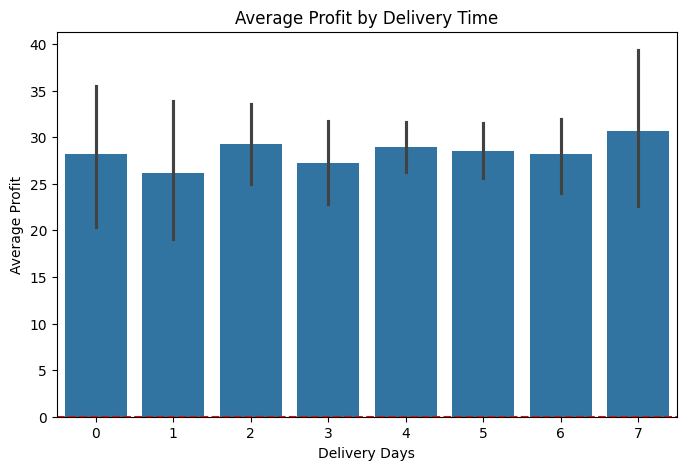

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    x='Delivery_Days',
    y='Profit',
    data=df,
    estimator='mean'
)
plt.axhline(0, color='red', linestyle='--')
plt.title('Average Profit by Delivery Time')
plt.xlabel('Delivery Days')
plt.ylabel('Average Profit')
plt.show()


In [34]:
df.groupby('Delivery_Days')['Shipping.Cost'].mean()


Delivery_Days
0    43.155500
1    44.469443
2    39.051520
3    35.689581
4    22.438318
5    18.792680
6    18.038789
7    21.279097
Name: Shipping.Cost, dtype: float64

### Shipping Speed and Profitability

Analysis indicates that faster delivery does not necessarily translate to higher
profitability. Orders delivered within moderate timeframes tend to achieve better
profit margins, suggesting that excessive spending on expedited shipping may reduce
overall profitability.


## High-Sales but Loss-Making Products
This analysis identifies products that generate substantial revenue but result in
overall losses.


In [35]:
product_summary = df.groupby('Product.Name').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Order.ID', 'count')
).reset_index()


In [36]:
product_summary.sort_values(
    by='Total_Sales',
    ascending=False
).head(10)


,Product.Name,Total_Sales,Total_Profit,Order_Count
310,"Apple Smart Phone, Full Size",86936,5921.5786,51
970,"Cisco Smart Phone, Full Size",76441,17238.5206,38
2415,"Motorola Smart Phone, Full Size",73159,17027.1130,38
2501,"Nokia Smart Phone, Full Size",71904,9938.1955,47
866,Canon imageCLASS 2200 Advanced Copier,61600,25199.9280,5
1837,"Hon Executive Leather Armchair, Adjustable",58200,5997.2541,49
2631,"Office Star Executive Leather Armchair, Adjust...",50667,4710.9840,45
1714,"Harbour Creations Executive Leather Armchair, ...",50120,10427.3260,39
2988,"Samsung Smart Phone, Cordless",48654,-198.0900,26
2502,"Nokia Smart Phone, with Caller ID",47880,9465.3257,24


In [37]:
product_summary[product_summary['Total_Profit'] < 0] \
    .sort_values(by='Total_Profit') \
    .head(10)


,Product.Name,Total_Sales,Total_Profit,Order_Count
1007,Cubify CubeX 3D Printer Double Head Print,11100,-8879.9704,3
2233,Lexmark MX611dhe Monochrome Laser Printer,16830,-4589.9730,4
2414,"Motorola Smart Phone, Cordless",38935,-4447.0380,23
1008,Cubify CubeX 3D Printer Triple Head Print,8000,-3839.9904,1
614,"Bevis Round Table, Adjustable Height",5655,-3649.8940,5
603,"Bevis Computer Table, Fully Assembled",11176,-3509.5638,13
2847,"Rogers Lockers, Blue",28215,-2893.4908,42
910,Chromcraft Bull-Nose Wood Oval Conference Tabl...,9918,-2876.1156,5
627,"Bevis Wood Table, with Bottom Storage",11134,-2782.5880,10
2221,"Lesro Training Table, Rectangular",2712,-2581.2834,5


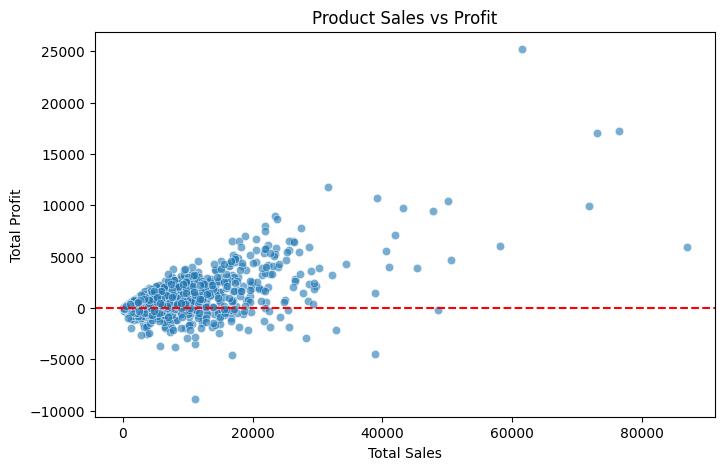

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Total_Sales',
    y='Total_Profit',
    data=product_summary,
    alpha=0.6
)
plt.axhline(0, color='red', linestyle='--')
plt.title('Product Sales vs Profit')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.show()


### High-Sales but Loss-Making Products

Analysis reveals several products that generate high sales volumes but result in
significant overall losses. These products are often bulky or high-value items,
suggesting that excessive discounting and elevated shipping costs may be eroding
profit margins. Addressing pricing, discount policies, or logistics for these products
could significantly improve overall profitability.


## Key Business Insights

- Deep discounting beyond 20% consistently erodes profitability.
- Expedited shipping increases operational cost without proportional profit gains.
- Certain high-sales products are structurally unprofitable and require pricing or
  logistics intervention.


## Conclusion

This exploratory analysis highlights critical factors affecting profitability,
including discount strategy, shipping efficiency, and product-level performance.
Addressing these areas can significantly improve overall business margins.
